In [ ]:
from typing import List, Dict, Optional, Any

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
from pathlib import Path

In [27]:
# Need only change these fields, the rest is automated

REPORT_ROOT_FOLDER = Path("./report")

REPORT_ID = "1710050285"
RPS = [20, 500, 1000, 1500, 2000] # , 500, 1000, 1500, 2000
MSZ = 50

SESSION_ROOT_FOLDER = str(Path(REPORT_ROOT_FOLDER) / REPORT_ID)

In [28]:
carbon_reports: Dict[int, pd.DataFrame] = dict()
for rps in RPS:
    _fn = f"carbon-report-{rps}rps-{MSZ}msz.csv"
    carbon_reports[rps] = pd.read_csv(Path(SESSION_ROOT_FOLDER) / _fn)

In [30]:
def plot_carbon_report(
        creps: Dict[int, pd.DataFrame], 
        y_series: str,
        y_label: str = "Unit",
        title: str = "Carbon Report",
):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x_data = list(creps.values())[0]['timestamp']
    x_data = x_data - x_data.min()
    
    for rps, df in creps.items():
        ax.plot(x_data, df[y_series], linewidth=1, label=f"{rps}")
    
    ax.set_title(title)
    ax.set_xlabel("Seconds since start")
    ax.set_ylabel(y_label)
    
    ax.legend(title="RPS")
    
    plt.show()
    

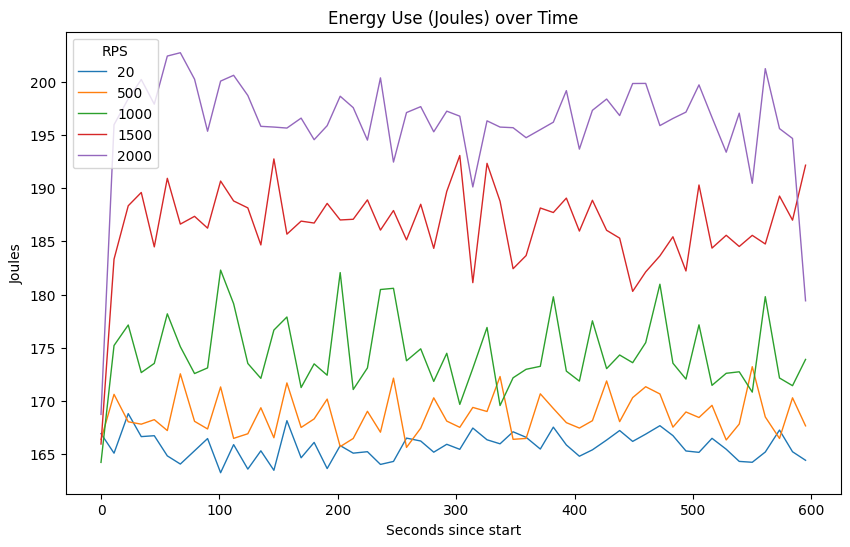

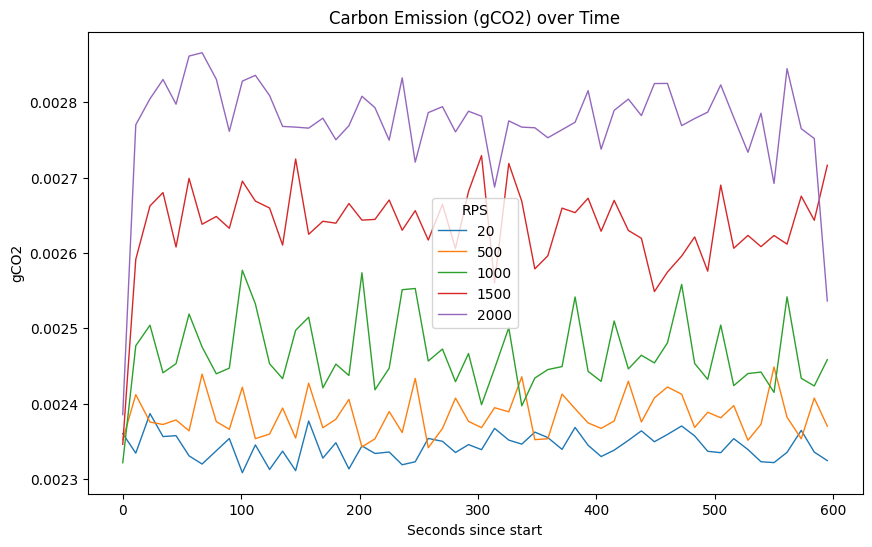

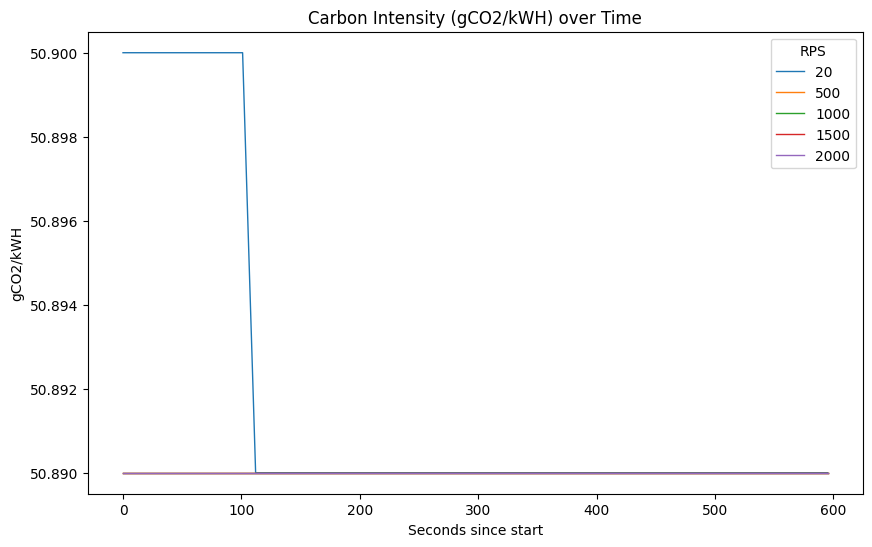

In [31]:
plot_carbon_report(carbon_reports, y_series="energy_use_watts", y_label="Joules", title="Energy Use (Joules) over Time")
plot_carbon_report(carbon_reports, y_series="carbon_emission_gco2", y_label="gCO2", title="Carbon Emission (gCO2) over Time")
plot_carbon_report(carbon_reports, y_series="carbon_intensity_gco2_kwh", y_label="gCO2/kWH", title="Carbon Intensity (gCO2/kWH) over Time")

#### CLOUDLET_CARBON_HISTORY

In [32]:
cc_df = pd.read_csv('./report/c.csv')

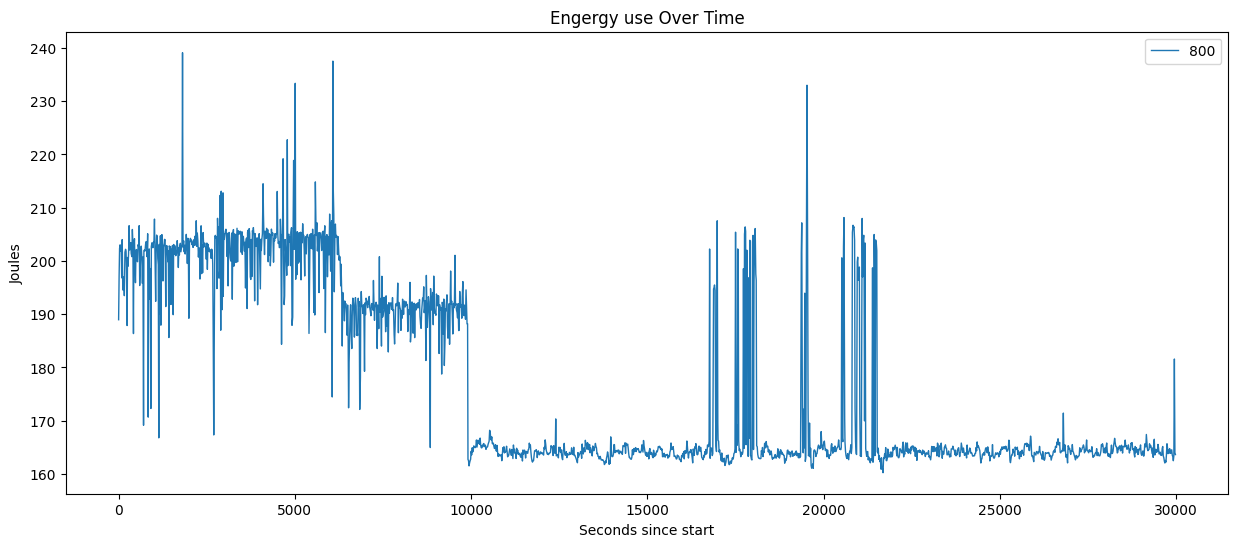

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming report_df is your Pandas DataFrame with the specified fields
# If not, replace it with your actual DataFrame

cc = cc_df.head(2000)

x50 = cc['ts']
x50 = x50 - x50.min()

# x400 = rdf400['timestamp']
# x400 = x400 - x400.min()

# x800 = rdf800['timestamp']
# x800 = x800 - x800.min()

field = 'eu'
y50 = cc[field]
# y400 = rdf400[field]
# y800 = rdf800[field]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(x50, y50, linestyle='-', linewidth=1, label='800')
# plt.plot(x400, y400, linestyle='--', linewidth=1, label='400')
# plt.plot(x800, y800, linestyle='-.', linewidth=1, label='800')

# Customize the plot
plt.title('Engergy use Over Time')
plt.xlabel('Seconds since start')
plt.ylabel('Joules')


# Show legend to differentiate between series
plt.legend()

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)

# Display the plot
plt.show()